In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
data = pd.read_csv('USA_Housing.csv')

In [6]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [8]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


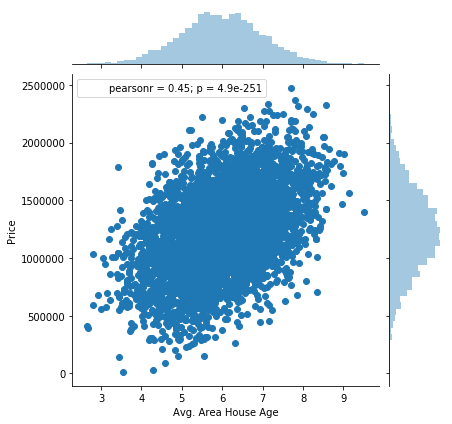

In [9]:
sns.jointplot('Avg. Area House Age', 'Price', data = data)

In [23]:
X = data.drop(['Price','Address'],axis = 1)

In [24]:
y = data['Price']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
pred = lr.predict(X_test)

Text(0,0.5,'Prediction')

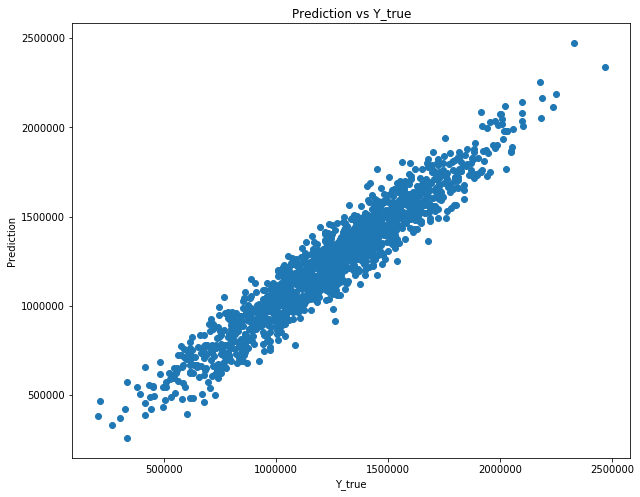

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,pred)
plt.title('Prediction vs Y_true')
plt.xlabel('Y_true')
plt.ylabel('Prediction')

In [38]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
lr_scaled = LinearRegression()

In [40]:
lr_scaled.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
pred_sc = lr_scaled.predict(X_test)

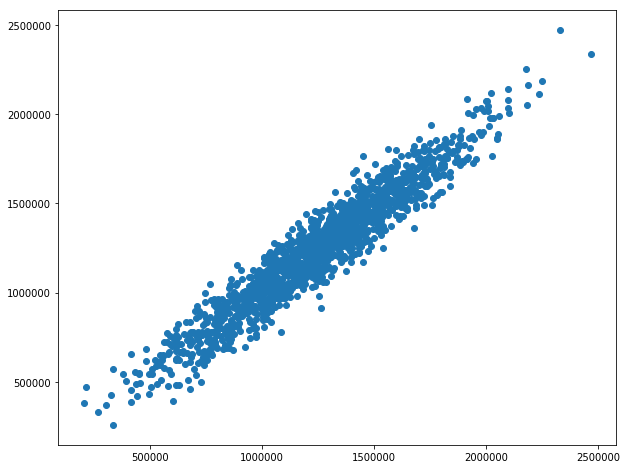

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,pred_sc)


In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [45]:
print("MSE : " +str(mean_squared_error(y_test,pred)))

MSE : 10068422551.400928


In [46]:
print("MSE : " +str(mean_squared_error(y_test,pred_sc)))

MSE : 10068422551.40088


In [49]:
print('MAE : ' + str(mean_absolute_error(y_test,pred)))

MAE : 81135.5660933688


In [50]:
print('MAE : ' + str(mean_absolute_error(y_test,pred_sc)))

MAE : 81135.56609336878


In [52]:
-mean_absolute_error(y_test,pred_sc) + (mean_absolute_error(y_test,pred))

2.9103830456733704e-11

In [54]:
import keras 

In [55]:
from keras.models import Sequential

In [56]:
from keras.layers import Dense

In [57]:
lr_deep = Sequential()

In [58]:
X_test.shape[1]

5

In [60]:
lr_deep.add(Dense(3,activation = 'relu', kernel_initializer='uniform',input_dim = X_train.shape[1]))

In [63]:
lr_deep.add(Dense(3,activation = 'relu', kernel_initializer='uniform'))
lr_deep.add(Dense(3,activation = 'relu', kernel_initializer='uniform'))

In [64]:
lr_deep.add(Dense(1, activation= 'tanh', kernel_initializer='uniform'))

In [68]:
lr_deep.compile(optimizer='adam',loss=keras.losses.mean_absolute_error,metrics=['accuracy'])

In [69]:
lr_deep.fit(X_train,y_train,epochs=100, batch_size=10)

Epoch 1/100
3500/3500 [==============================] - 1s 351us/step - loss: 1228218.1488 - acc: 0.0000e+00
Epoch 2/100
3500/3500 [==============================] - 1s 193us/step - loss: 1228218.1430 - acc: 0.0000e+00
Epoch 3/100
3500/3500 [==============================] - 0s 138us/step - loss: 1228218.1521 - acc: 0.0000e+00
Epoch 4/100
3500/3500 [==============================] - 1s 200us/step - loss: 1228218.1454 - acc: 0.0000e+00
Epoch 5/100
3500/3500 [==============================] - 1s 187us/step - loss: 1228218.1446 - acc: 0.0000e+00
Epoch 6/100
3500/3500 [==============================] - 1s 191us/step - loss: 1228218.1527 - acc: 0.0000e+00
Epoch 7/100
3500/3500 [==============================] - 1s 193us/step - loss: 1228218.1466 - acc: 0.0000e+00
Epoch 8/100
3500/3500 [==============================] - 1s 198us/step - loss: 1228218.1400 - acc: 0.0000e+00
Epoch 9/100
3500/3500 [==============================] - 1s 204us/step - loss: 1228218.1446 - acc: 0.0000e+00
Epoch 10/1

3500/3500 [==============================] - 1s 200us/step - loss: 1228218.1464 - acc: 0.0000e+00
Epoch 75/100
3500/3500 [==============================] - 1s 211us/step - loss: 1228218.1502 - acc: 0.0000e+00
Epoch 76/100
3500/3500 [==============================] - 1s 203us/step - loss: 1228218.1523 - acc: 0.0000e+00
Epoch 77/100
3500/3500 [==============================] - 1s 201us/step - loss: 1228218.1500 - acc: 0.0000e+00
Epoch 78/100
3500/3500 [==============================] - 1s 153us/step - loss: 1228218.1509 - acc: 0.0000e+00
Epoch 79/100
3500/3500 [==============================] - 1s 183us/step - loss: 1228218.1518 - acc: 0.0000e+00
Epoch 80/100
3500/3500 [==============================] - 1s 196us/step - loss: 1228218.1525 - acc: 0.0000e+00
Epoch 81/100
3500/3500 [==============================] - 1s 158us/step - loss: 1228218.1495 - acc: 0.0000e+00
Epoch 82/100
3500/3500 [==============================] - 1s 192us/step - loss: 1228218.1511 - acc: 0.0000e+00
Epoch 83/100
3

In [71]:
lr_deep.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [76]:
pred_ = lr_deep.predict_(X_test)

In [77]:
pred_

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

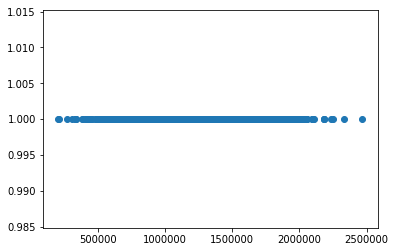

In [74]:
plt.scatter(y_test,pred_)